# Compare the Model Sensitivity to HWP Half-life and Displacement Factor when Minimizing Net System Carbon Emission with Even-flow Constraints

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
extract_period = 20

## Compare the Model Sensitivity to HWPs Half-life

Assuming the HWP half-life is equal to 1.0

In [3]:
displacement_factor_hl = 1.0

In [4]:
iteration_hl = 200

In [5]:
base_folder_hl = 'results/minimize_emission_loop/half_life/even_flow'

In [6]:
folder_path_hl = os.path.join(base_folder_hl, f"df_{displacement_factor_hl}/")

In [7]:
harvest_path_hl = folder_path_hl + 'harvest'
stock_path_hl = folder_path_hl + 'stock'
emission_path_hl = folder_path_hl + 'emission'

In [8]:
# Initialize dictionaries to hold data for each metric across all files
oha_data = {}
ohv_data = {}
ogs_data = {}
product_stock = {}
ecosystem_stock = {}
system_stock = {}
product_emission = {}
ecosystem_emission = {}
system_emission = {}

# Initialize dictionaries to hold extracted values for the specified period
oha_period = {}
ohv_period = {}
ogs_period = {}
product_stock_period = {}
ecosystem_stock_period = {}
system_stock_period = {}
product_emission_period = {}
ecosystem_emission_period = {}
system_emission_period = {}

In [9]:
# Loop through half-life from 1 to 200
for half_life in range(1, iteration_hl + 1):
    # Construct paths for each half-life
    harvest_path = os.path.join(harvest_path_hl, f'{half_life}.csv')
    stock_path = os.path.join(stock_path_hl, f'{half_life}.csv')
    emission_path = os.path.join(emission_path_hl, f'{half_life}.csv')
    
    # Read the CSV files
    df_harvest = pd.read_csv(harvest_path)
    df_stock = pd.read_csv(stock_path)
    df_emission = pd.read_csv(emission_path)
    
    # Store the data for this half-life (full data for all periods)
    oha_data[half_life] = df_harvest['oha']
    ohv_data[half_life] = df_harvest['ohv']
    ogs_data[half_life] = df_harvest['ogs']
    product_stock[half_life] = df_stock['solid_wood']
    ecosystem_stock[half_life] = df_stock['ecosystem']
    system_stock[half_life] = df_stock['system']
    product_emission[half_life] = df_emission['solid_wood']
    ecosystem_emission[half_life] = df_emission['ecosystem']
    system_emission[half_life] = df_emission['system']

    # Extract the values for the specified period (e.g., period 1)
    period_mask = df_harvest['period'] == extract_period
    oha_period[half_life] = df_harvest.loc[period_mask, 'oha'].values[0]
    ohv_period[half_life] = df_harvest.loc[period_mask, 'ohv'].values[0]
    ogs_period[half_life] = df_harvest.loc[period_mask, 'ogs'].values[0]
    product_stock_period[half_life] = df_stock.loc[period_mask, 'solid_wood'].values[0]
    ecosystem_stock_period[half_life] = df_stock.loc[period_mask, 'ecosystem'].values[0]
    system_stock_period[half_life] = df_stock.loc[period_mask, 'system'].values[0]
    product_emission_period[half_life] = df_emission.loc[period_mask, 'solid_wood'].values[0]
    ecosystem_emission_period[half_life] = df_emission.loc[period_mask, 'ecosystem'].values[0]
    system_emission_period[half_life] = df_emission.loc[period_mask, 'system'].values[0]

### Plot 'oha', 'ohv', 'ogs', 'Total System Carbon Stock', and 'Net System Carbon Emission'

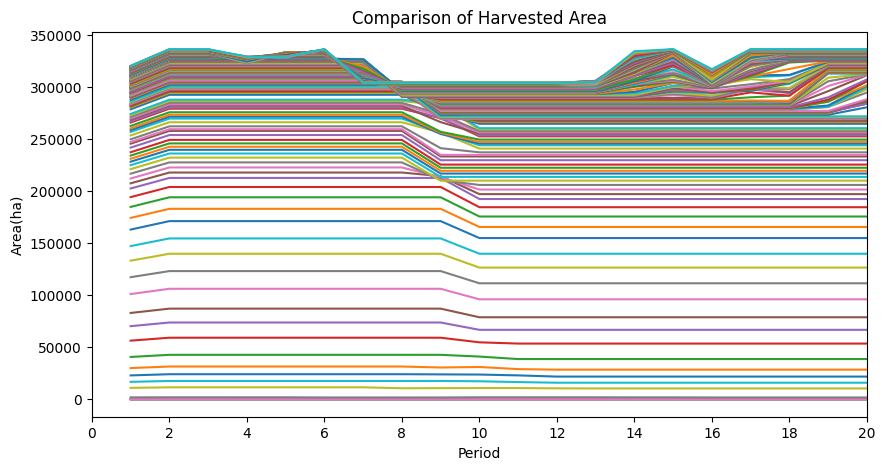

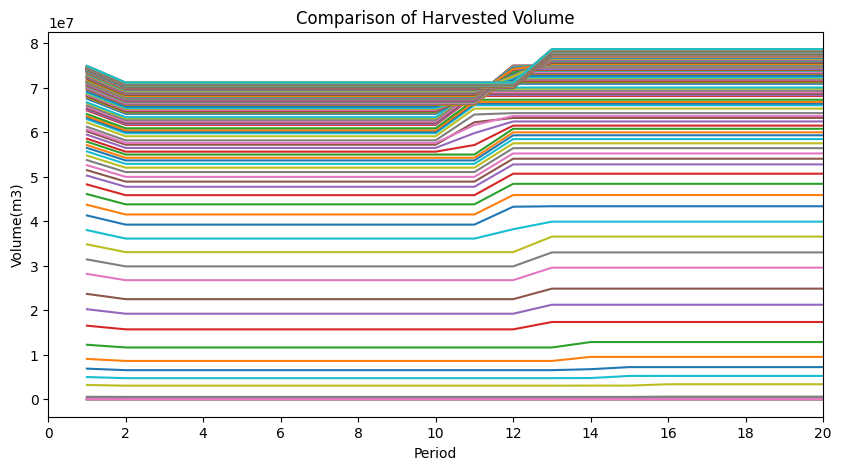

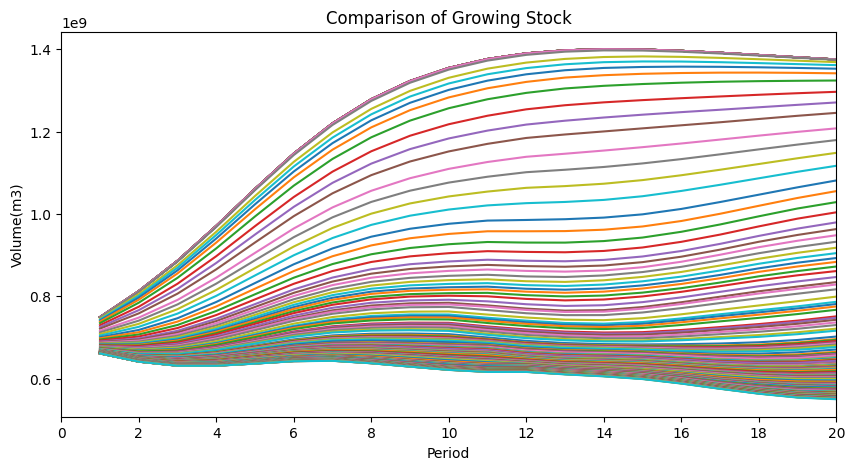

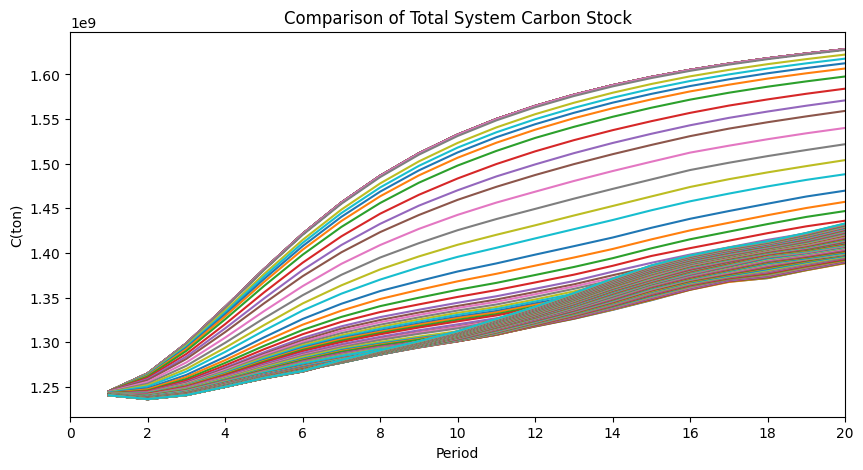

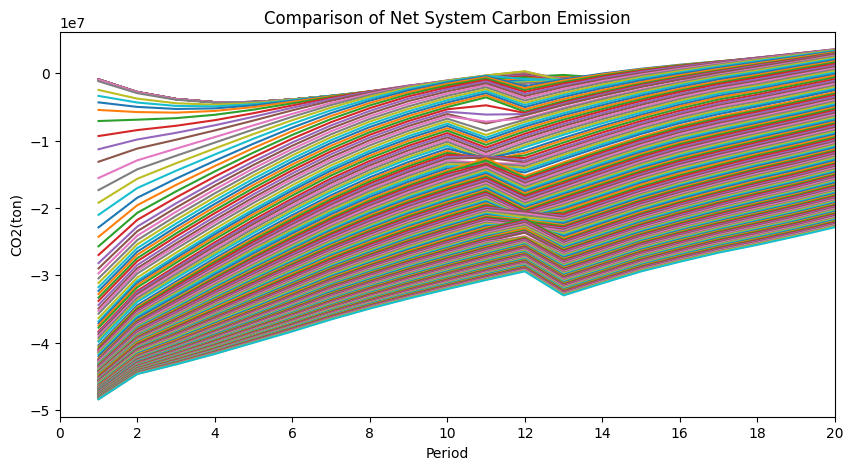

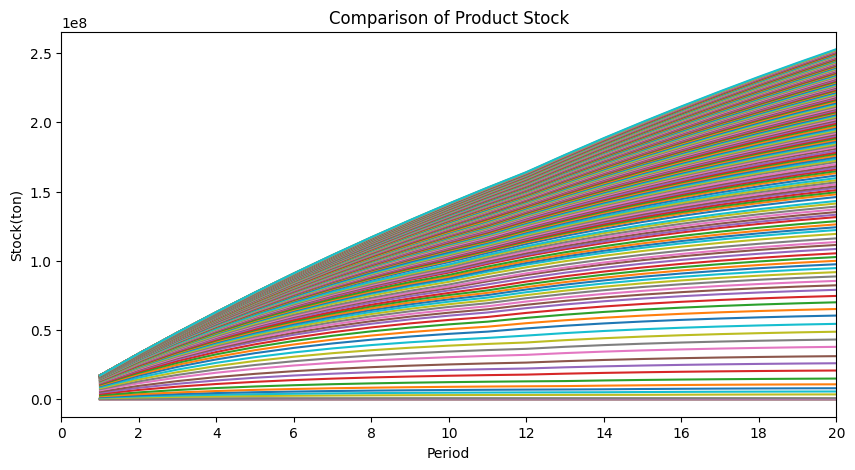

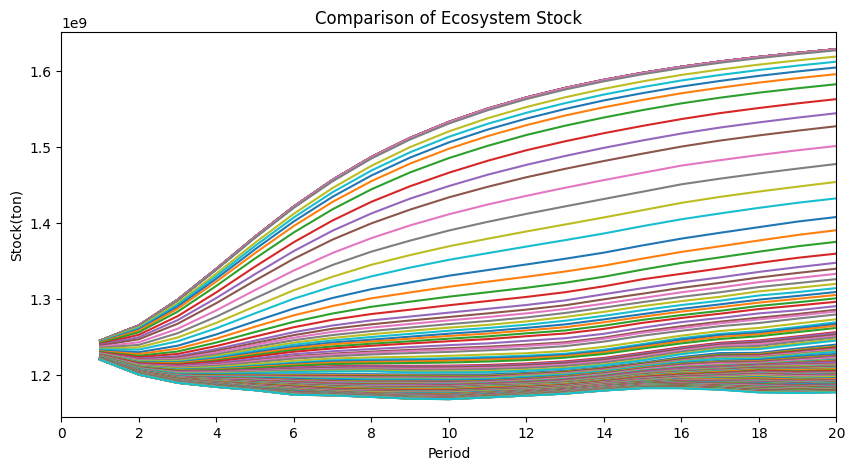

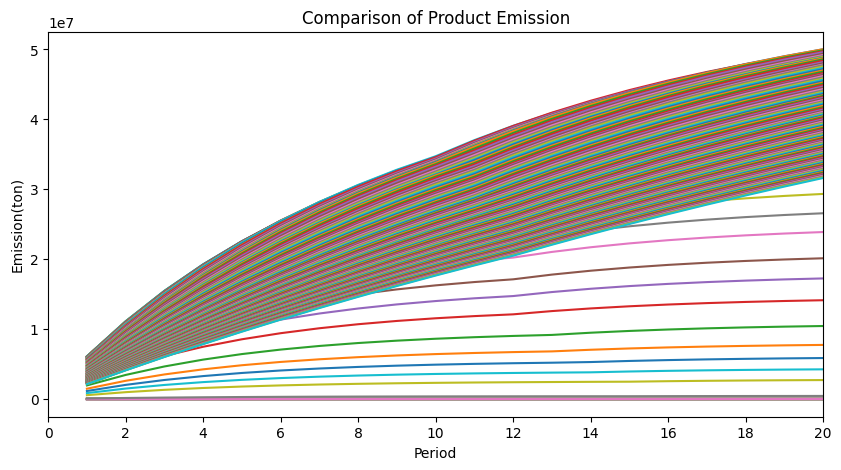

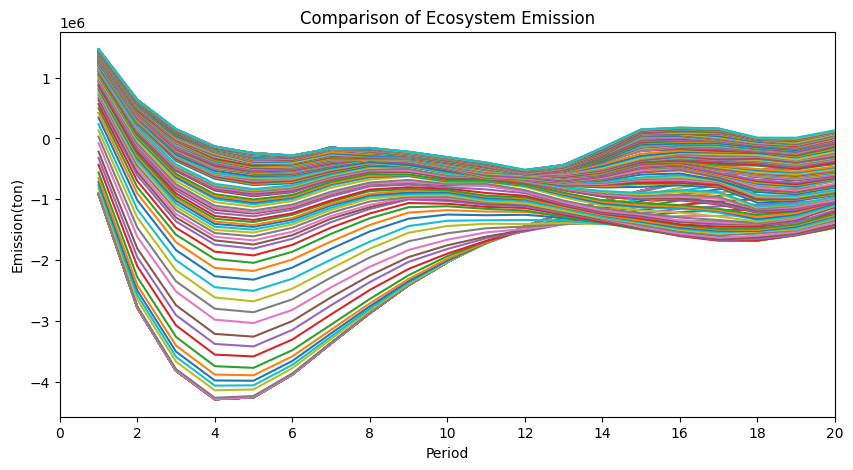

In [10]:
import matplotlib.pyplot as plt

# 1. Plot for 'Harvested Area'
plt.figure(figsize=(10, 5))
for half_life, data in oha_data.items():
    plt.plot(df_harvest['period'], data, label=f'{half_life}')
plt.title('Comparison of Harvested Area')
plt.xlabel('Period')
plt.ylabel('Area(ha)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 2. Plot for 'Harvested Volume'
plt.figure(figsize=(10, 5))
for half_life, data in ohv_data.items():
    plt.plot(df_harvest['period'], data, label=f'{half_life}')
plt.title('Comparison of Harvested Volume')
plt.xlabel('Period')
plt.ylabel('Volume(m3)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 3. Plot for 'Growing Stock'
plt.figure(figsize=(10, 5))
for half_life, data in ogs_data.items():
    plt.plot(df_harvest['period'], data, label=f'{half_life}')
plt.title('Comparison of Growing Stock')
plt.xlabel('Period')
plt.ylabel('Volume(m3)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 4. Plot for 'Total System Carbon Stock'
plt.figure(figsize=(10, 5))
for half_life, data in system_stock.items():
    plt.plot(df_stock['period'], data, label=f'{half_life}')
plt.title('Comparison of Total System Carbon Stock')
plt.xlabel('Period')
plt.ylabel('C(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 5. Plot for 'Net System Carbon Emission'
plt.figure(figsize=(10, 5))
for half_life, data in system_emission.items():
    plt.plot(df_emission['period'], data, label=f'{half_life}')
plt.title('Comparison of Net System Carbon Emission')
plt.xlabel('Period')
plt.ylabel('CO2(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
# plt.legend()
plt.show()

# 6. Plot for 'Product Stock'
plt.figure(figsize=(10, 5))
for half_life, data in product_stock.items():
    plt.plot(df_stock['period'], data, label=f'{half_life}')
plt.title('Comparison of Product Stock')
plt.xlabel('Period')
plt.ylabel('Stock(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 7. Plot for 'Ecosystem Stock'
plt.figure(figsize=(10, 5))
for half_life, data in ecosystem_stock.items():
    plt.plot(df_stock['period'], data, label=f'{half_life}')
plt.title('Comparison of Ecosystem Stock')
plt.xlabel('Period')
plt.ylabel('Stock(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 8. Plot for 'Product Emission'
plt.figure(figsize=(10, 5))
for half_life, data in product_emission.items():
    plt.plot(df_emission['period'], data, label=f'{half_life}')
plt.title('Comparison of Product Emission')
plt.xlabel('Period')
plt.ylabel('Emission(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 9. Plot for 'Ecosystem Emission'
plt.figure(figsize=(10, 5))
for half_life, data in ecosystem_emission.items():
    plt.plot(df_emission['period'], data, label=f'{half_life}')
plt.title('Comparison of Ecosystem Emission')
plt.xlabel('Period')
plt.ylabel('Emission(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

### Plot each metric's value for the specified period against half-lives

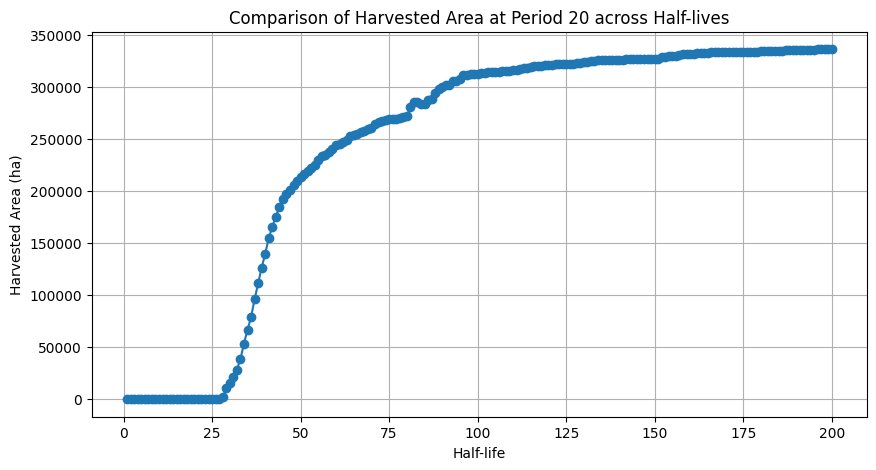

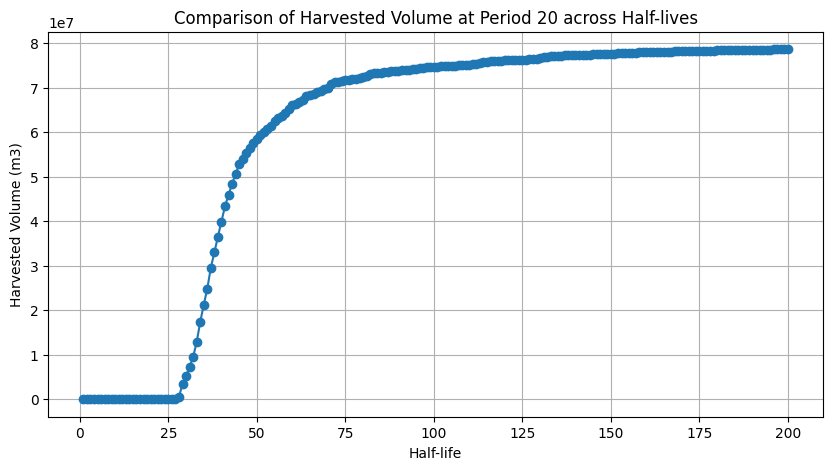

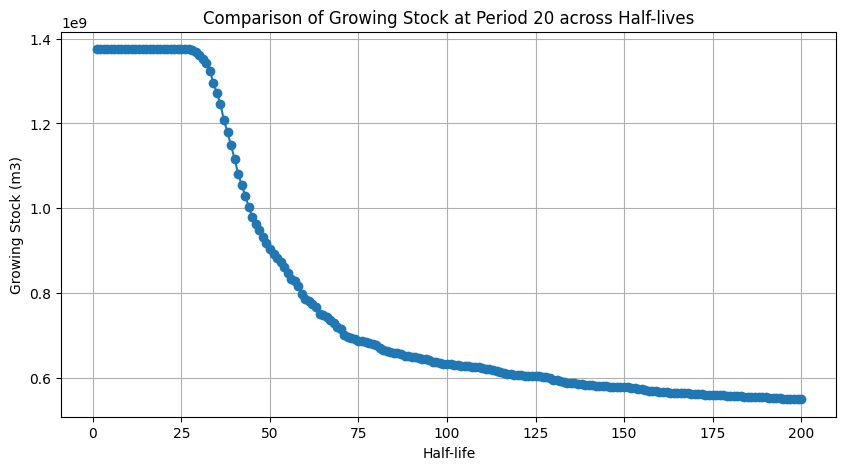

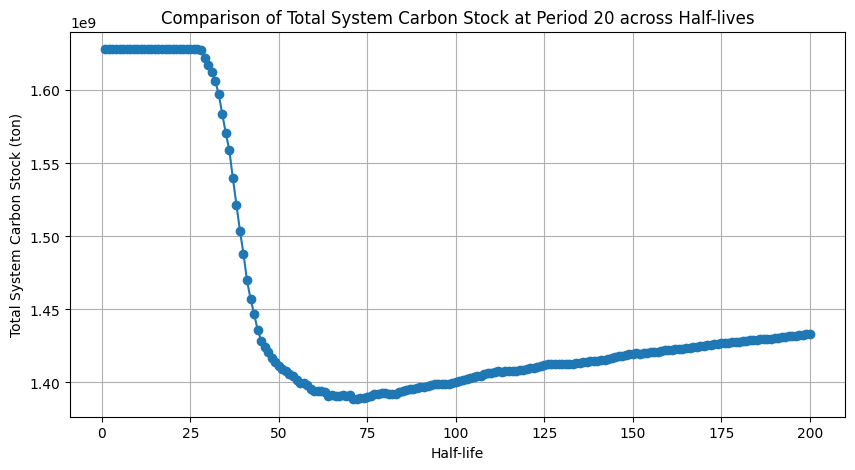

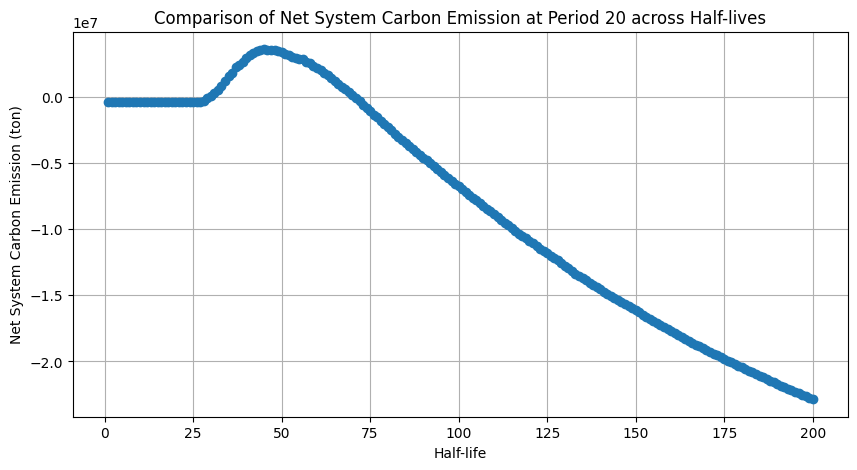

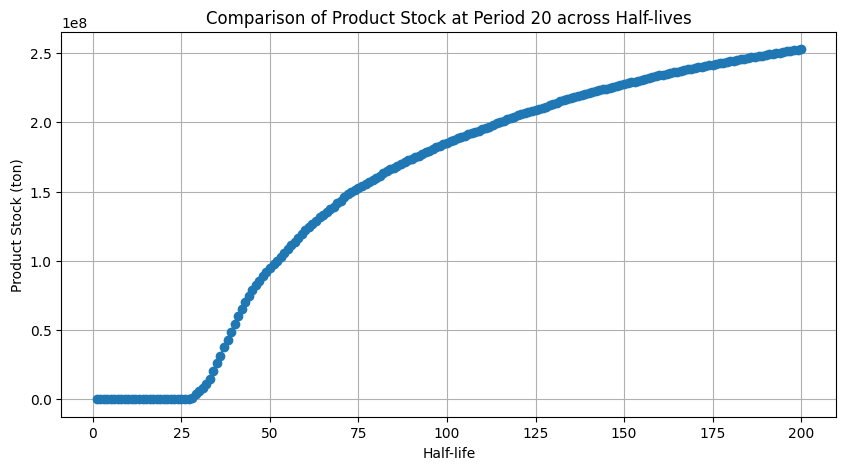

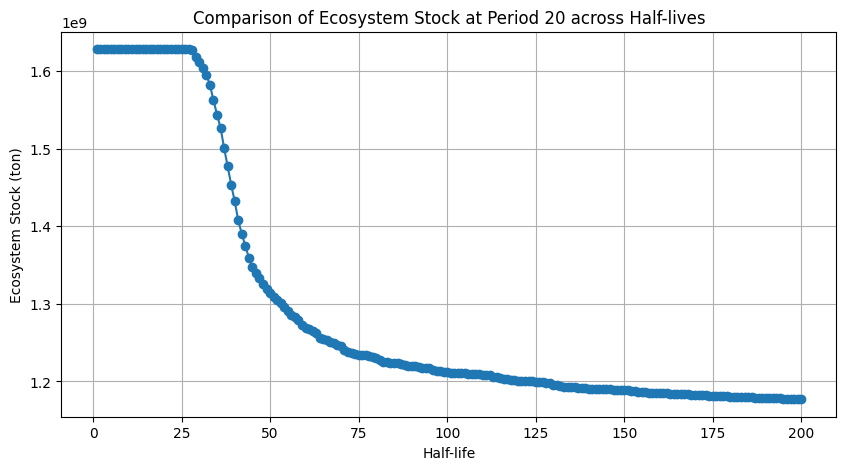

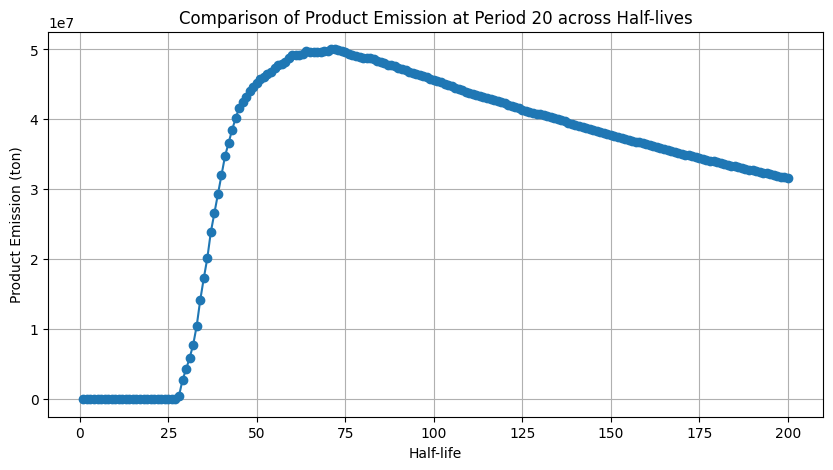

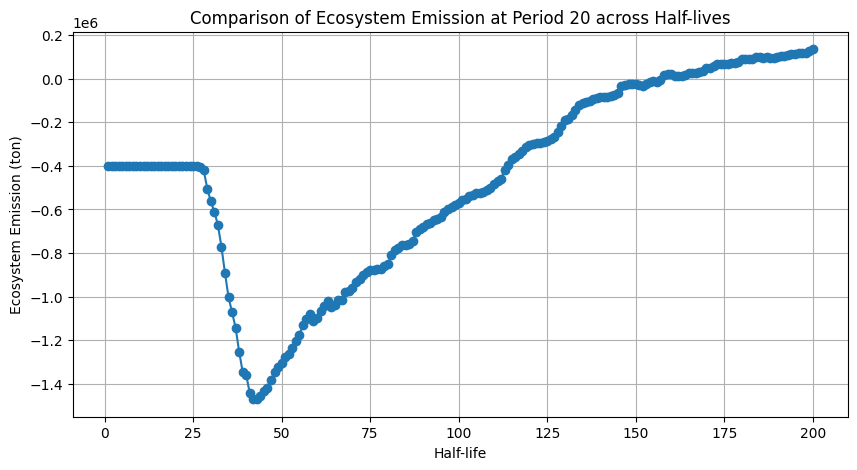

In [11]:
# 1. Plot for 'Harvested Area' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(oha_period.keys()), list(oha_period.values()), marker='o')
plt.title(f'Comparison of Harvested Area at Period {extract_period} across Half-lives')
plt.xlabel('Half-life')
plt.ylabel('Harvested Area (ha)')
plt.grid(True)
plt.show()

# 2. Plot for 'Harvested Volume' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(ohv_period.keys()), list(ohv_period.values()), marker='o')
plt.title(f'Comparison of Harvested Volume at Period {extract_period} across Half-lives')
plt.xlabel('Half-life')
plt.ylabel('Harvested Volume (m3)')
plt.grid(True)
plt.show()

# 3. Plot for 'Growing Stock' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(ogs_period.keys()), list(ogs_period.values()), marker='o')
plt.title(f'Comparison of Growing Stock at Period {extract_period} across Half-lives')
plt.xlabel('Half-life')
plt.ylabel('Growing Stock (m3)')
plt.grid(True)
plt.show()

# 4. Plot for 'Total System Carbon Stock' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(system_stock_period.keys()), list(system_stock_period.values()), marker='o')
plt.title(f'Comparison of Total System Carbon Stock at Period {extract_period} across Half-lives')
plt.xlabel('Half-life')
plt.ylabel('Total System Carbon Stock (ton)')
plt.grid(True)
plt.show()

# 5. Plot for 'Net System Carbon Emission' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(system_emission_period.keys()), list(system_emission_period.values()), marker='o')
plt.title(f'Comparison of Net System Carbon Emission at Period {extract_period} across Half-lives')
plt.xlabel('Half-life')
plt.ylabel('Net System Carbon Emission (ton)')
plt.grid(True)
plt.show()

# 6. Plot for 'Product Stock' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(product_stock_period.keys()), list(product_stock_period.values()), marker='o')
plt.title(f'Comparison of Product Stock at Period {extract_period} across Half-lives')
plt.xlabel('Half-life')
plt.ylabel('Product Stock (ton)')
plt.grid(True)
plt.show()

# 7. Plot for 'Ecosystem Stock' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(ecosystem_stock_period.keys()), list(ecosystem_stock_period.values()), marker='o')
plt.title(f'Comparison of Ecosystem Stock at Period {extract_period} across Half-lives')
plt.xlabel('Half-life')
plt.ylabel('Ecosystem Stock (ton)')
plt.grid(True)
plt.show()

# 8. Plot for 'Product Emission' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(product_emission_period.keys()), list(product_emission_period.values()), marker='o')
plt.title(f'Comparison of Product Emission at Period {extract_period} across Half-lives')
plt.xlabel('Half-life')
plt.ylabel('Product Emission (ton)')
plt.grid(True)
plt.show()

# 9. Plot for 'Ecosystem Emission' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(ecosystem_emission_period.keys()), list(ecosystem_emission_period.values()), marker='o')
plt.title(f'Comparison of Ecosystem Emission at Period {extract_period} across Half-lives')
plt.xlabel('Half-life')
plt.ylabel('Ecosystem Emission (ton)')
plt.grid(True)
plt.show()

## Compare the Model Sensitivity to HWP Displacement Factor

Assuming the HWP Half-life is equal to 1 yeawr

In [12]:
iteration_df = 50

In [13]:
folder_path_df = 'results/minimize_emission_loop/displacement_factor/even_flow/'

In [14]:
harvest_path_df = folder_path_df + 'harvest'
stock_path_df = folder_path_df + 'stock'
emission_path_df = folder_path_df + 'emission'

In [15]:
# Initialize dictionaries to hold data for each metric across all files
oha_data = {}
ohv_data = {}
ogs_data = {}
product_stock = {}
ecosystem_stock = {}
system_stock = {}
product_emission = {}
ecosystem_emission = {}
system_emission = {}

# Initialize dictionaries to hold extracted values for the specified period
oha_period = {}
ohv_period = {}
ogs_period = {}
product_stock_period = {}
ecosystem_stock_period = {}
system_stock_period = {}
product_emission_period = {}
ecosystem_emission_period = {}
system_emission_period = {}

In [16]:
# Loop through displacement factor from 0.0 to 5.0
for i in range(iteration_df + 1):
# for i in range(0, 101, 10):
    displacement_factor = round(i * 0.1, 1)
    # Construct paths for each half-life
    harvest_path = os.path.join(harvest_path_df, f'{displacement_factor}.csv')
    stock_path = os.path.join(stock_path_df, f'{displacement_factor}.csv')
    emission_path = os.path.join(emission_path_df, f'{displacement_factor}.csv')
    
    # Read the CSV files
    df_harvest = pd.read_csv(harvest_path)
    df_stock = pd.read_csv(stock_path)
    df_emission = pd.read_csv(emission_path)
    
    # Store the data for this half-life (full data for all periods)
    oha_data[displacement_factor] = df_harvest['oha']
    ohv_data[displacement_factor] = df_harvest['ohv']
    ogs_data[displacement_factor] = df_harvest['ogs']
    product_stock[displacement_factor] = df_stock['solid_wood']
    ecosystem_stock[displacement_factor] = df_stock['ecosystem']
    system_stock[displacement_factor] = df_stock['system']
    product_emission[displacement_factor] = df_emission['solid_wood']
    ecosystem_emission[displacement_factor] = df_emission['ecosystem']
    system_emission[displacement_factor] = df_emission['system']

    # Extract the values for the specified period (e.g., period 1)
    period_mask = df_harvest['period'] == extract_period
    oha_period[displacement_factor] = df_harvest.loc[period_mask, 'oha'].values[0]
    ohv_period[displacement_factor] = df_harvest.loc[period_mask, 'ohv'].values[0]
    ogs_period[displacement_factor] = df_harvest.loc[period_mask, 'ogs'].values[0]
    product_stock_period[displacement_factor] = df_stock.loc[period_mask, 'solid_wood'].values[0]
    ecosystem_stock_period[displacement_factor] = df_stock.loc[period_mask, 'ecosystem'].values[0]
    system_stock_period[displacement_factor] = df_stock.loc[period_mask, 'system'].values[0]
    product_emission_period[displacement_factor] = df_emission.loc[period_mask, 'solid_wood'].values[0]
    ecosystem_emission_period[displacement_factor] = df_emission.loc[period_mask, 'ecosystem'].values[0]
    system_emission_period[displacement_factor] = df_emission.loc[period_mask, 'system'].values[0]

### Plot 'oha', 'ohv', 'ogs', 'Total System Carbon Stock', and 'Net System Carbon Emission'

### Plot 'oha', 'ohv', 'ogs', 'Total System Carbon Stock', and 'Net System Carbon Emission'

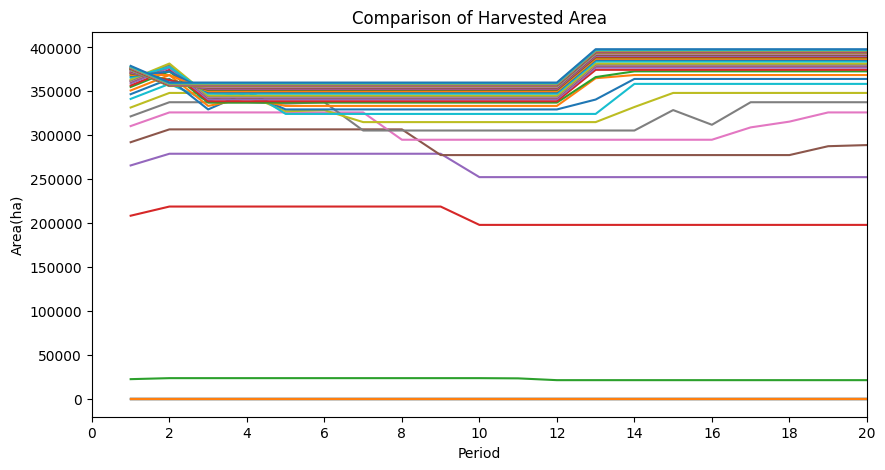

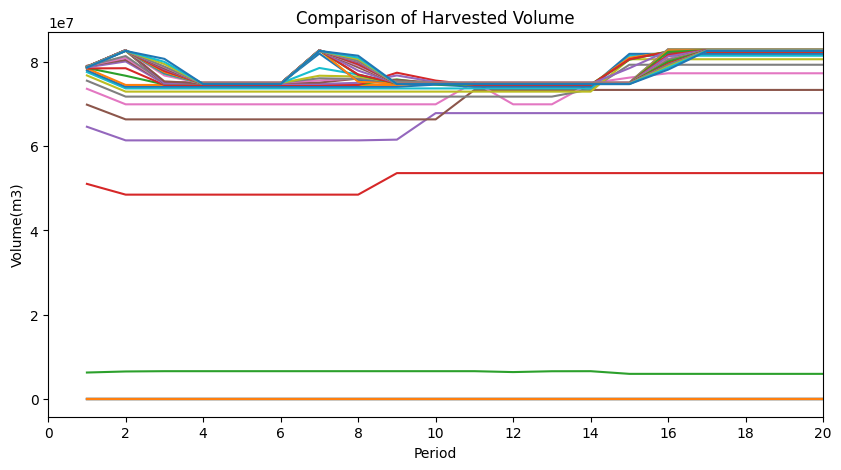

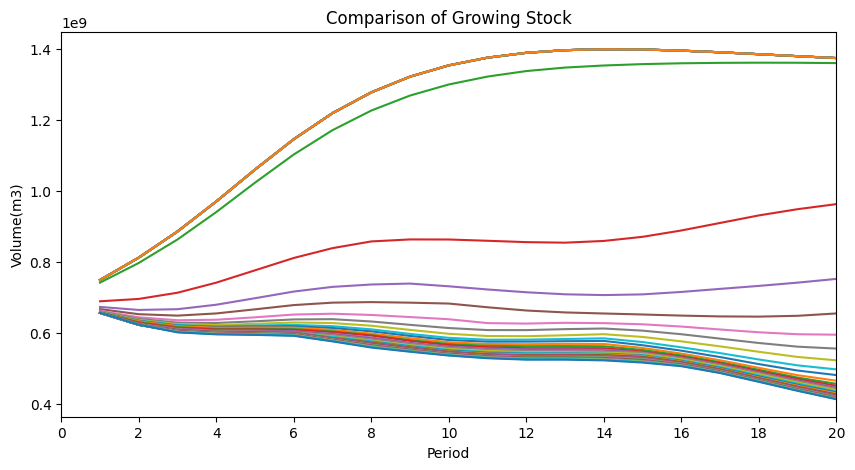

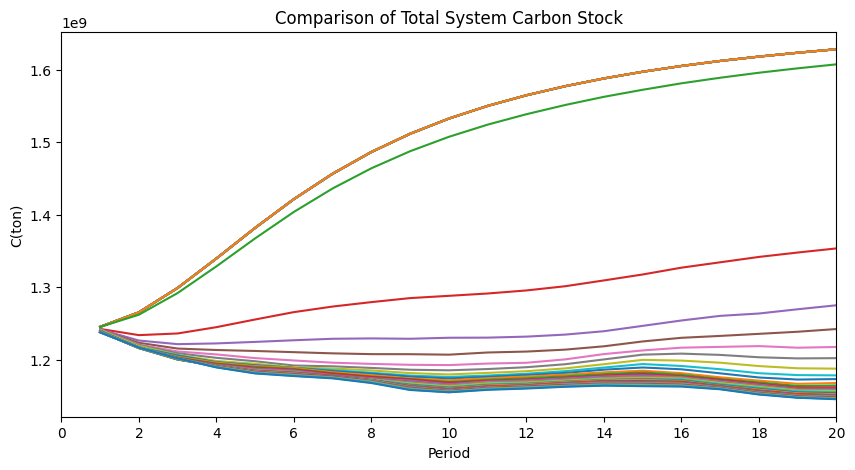

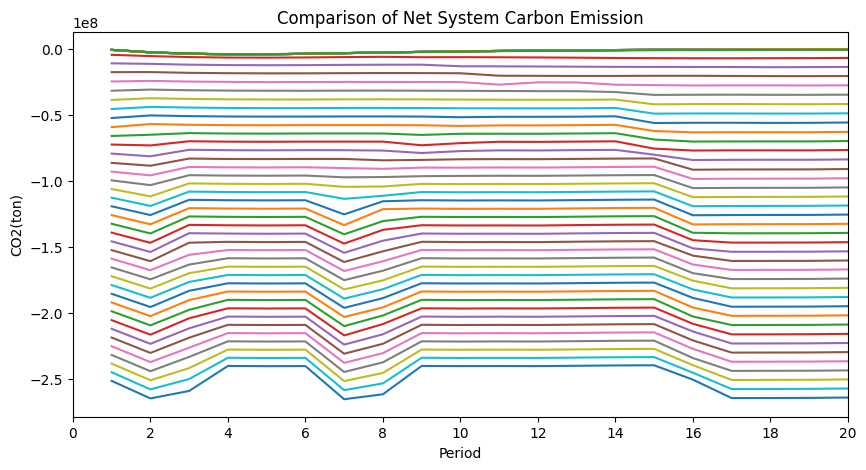

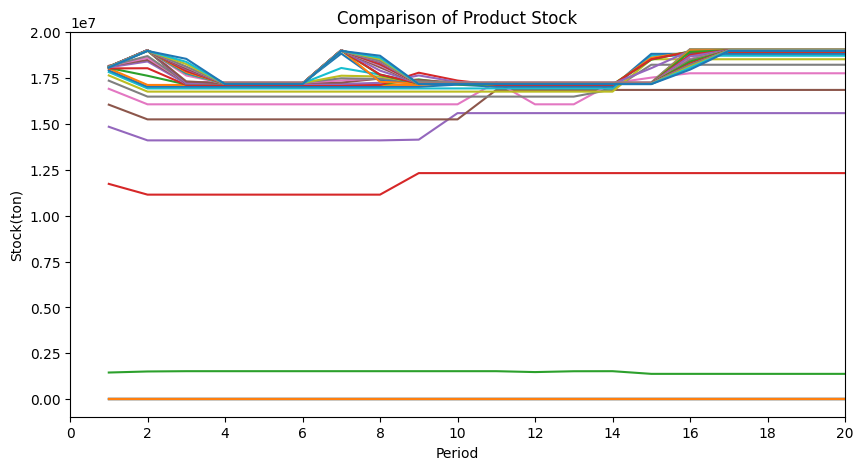

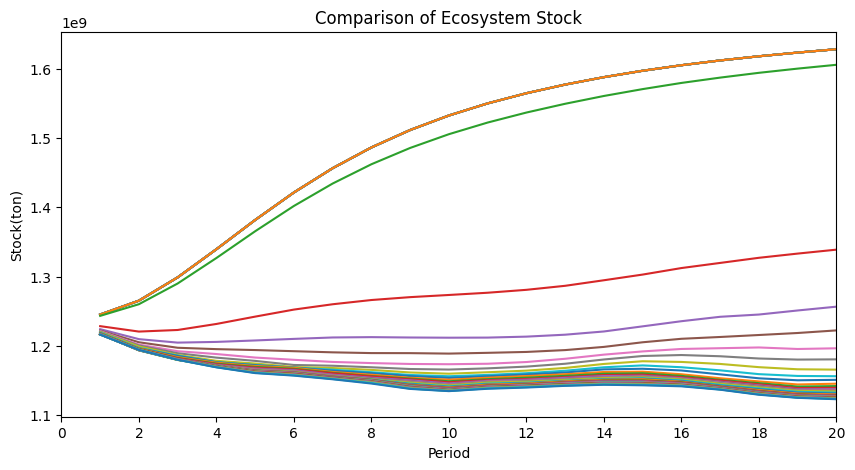

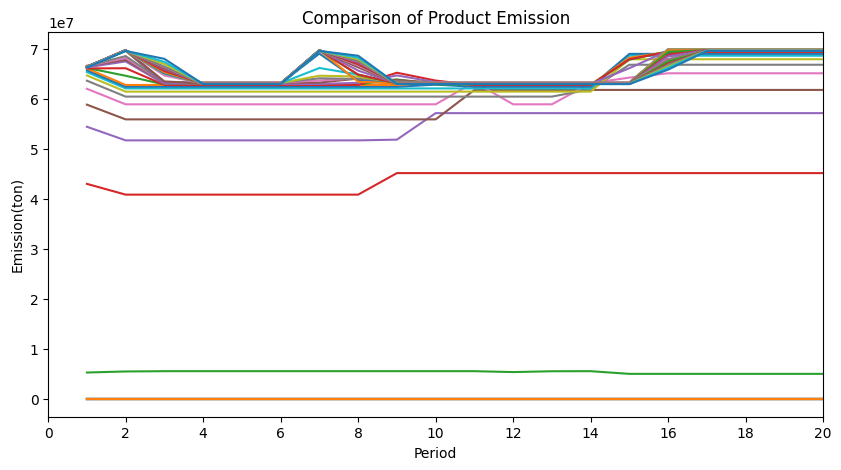

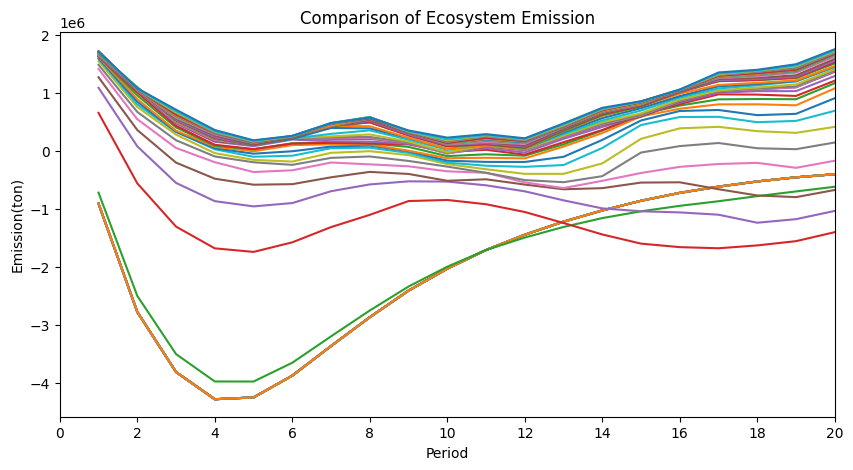

In [17]:
import matplotlib.pyplot as plt

# 1. Plot for 'Harvested Area'
plt.figure(figsize=(10, 5))
for displacement_factor, data in oha_data.items():
    plt.plot(df_harvest['period'], data, label=f'{displacement_factor}')
plt.title('Comparison of Harvested Area')
plt.xlabel('Period')
plt.ylabel('Area(ha)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 2. Plot for 'Harvested Volume'
plt.figure(figsize=(10, 5))
for displacement_factor, data in ohv_data.items():
    plt.plot(df_harvest['period'], data, label=f'{displacement_factor}')
plt.title('Comparison of Harvested Volume')
plt.xlabel('Period')
plt.ylabel('Volume(m3)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
# plt.legend()
plt.show()

# 3. Plot for 'Growing Stock'
plt.figure(figsize=(10, 5))
for displacement_factor, data in ogs_data.items():
    plt.plot(df_harvest['period'], data, label=f'{displacement_factor}')
plt.title('Comparison of Growing Stock')
plt.xlabel('Period')
plt.ylabel('Volume(m3)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 4. Plot for 'Total System Carbon Stock'
plt.figure(figsize=(10, 5))
for displacement_factor, data in system_stock.items():
    plt.plot(df_stock['period'], data, label=f'{displacement_factor}')
plt.title('Comparison of Total System Carbon Stock')
plt.xlabel('Period')
plt.ylabel('C(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 5. Plot for 'Net System Carbon Emission'
plt.figure(figsize=(10, 5))
for displacement_factor, data in system_emission.items():
    plt.plot(df_emission['period'], data, label=f'{displacement_factor}')
plt.title('Comparison of Net System Carbon Emission')
plt.xlabel('Period')
plt.ylabel('CO2(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
# plt.legend()
plt.show()

# 6. Plot for 'Product Stock'
plt.figure(figsize=(10, 5))
for displacement_factor, data in product_stock.items():
    plt.plot(df_stock['period'], data, label=f'{displacement_factor}')
plt.title('Comparison of Product Stock')
plt.xlabel('Period')
plt.ylabel('Stock(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 7. Plot for 'Ecosystem Stock'
plt.figure(figsize=(10, 5))
for displacement_factor, data in ecosystem_stock.items():
    plt.plot(df_stock['period'], data, label=f'{displacement_factor}')
plt.title('Comparison of Ecosystem Stock')
plt.xlabel('Period')
plt.ylabel('Stock(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 8. Plot for 'Product Emission'
plt.figure(figsize=(10, 5))
for displacement_factor, data in product_emission.items():
    plt.plot(df_emission['period'], data, label=f'{displacement_factor}')
plt.title('Comparison of Product Emission')
plt.xlabel('Period')
plt.ylabel('Emission(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

# 9. Plot for 'Ecosystem Emission'
plt.figure(figsize=(10, 5))
for displacement_factor, data in ecosystem_emission.items():
    plt.plot(df_emission['period'], data, label=f'{displacement_factor}')
plt.title('Comparison of Ecosystem Emission')
plt.xlabel('Period')
plt.ylabel('Emission(ton)')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2))
plt.show()

### Plot each metric's value for the specified period against half-lives

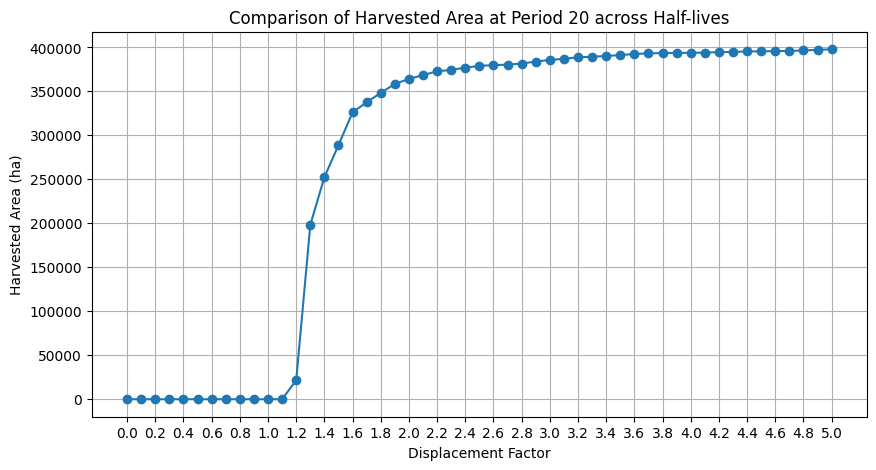

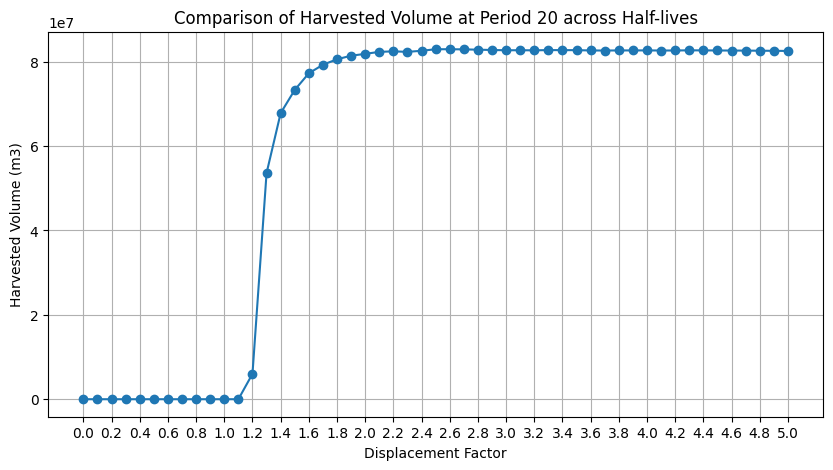

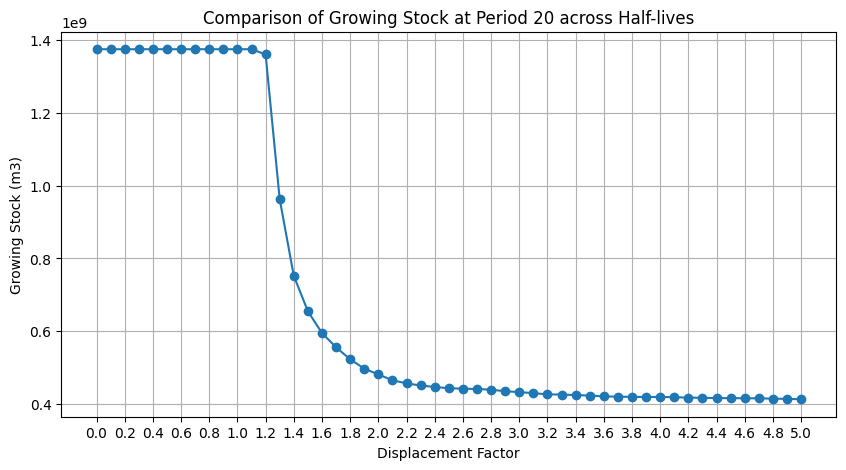

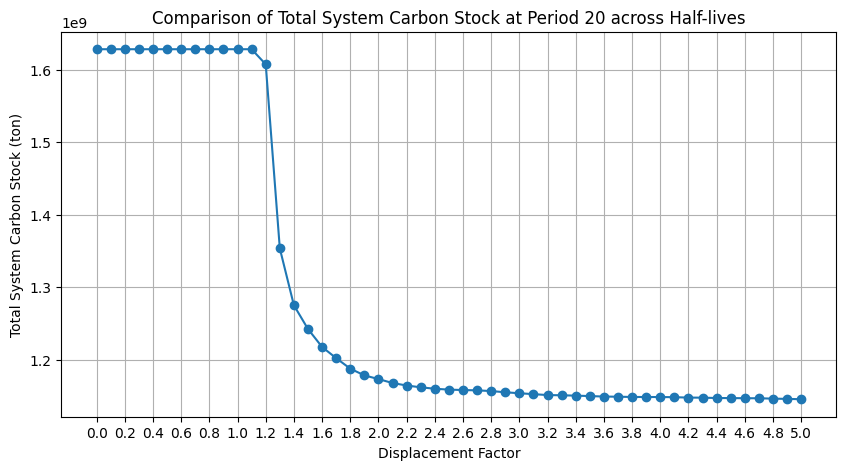

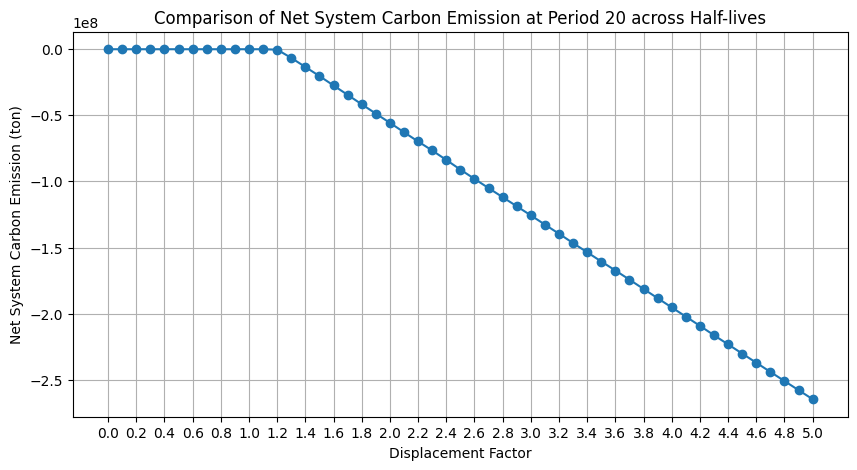

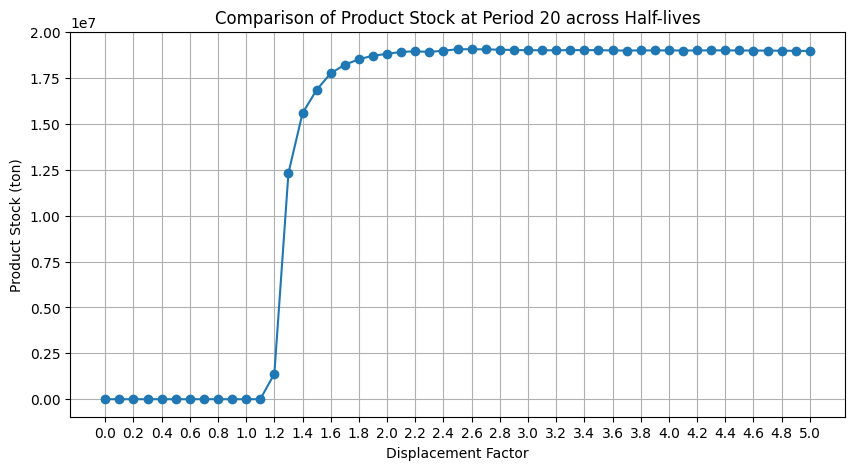

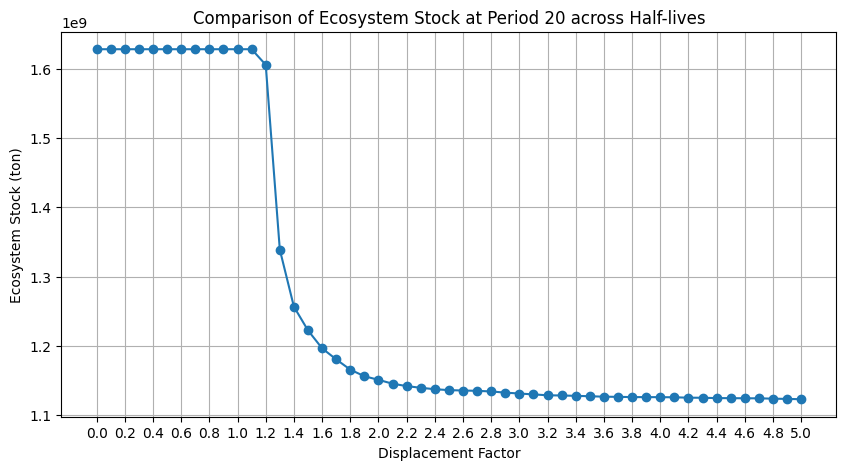

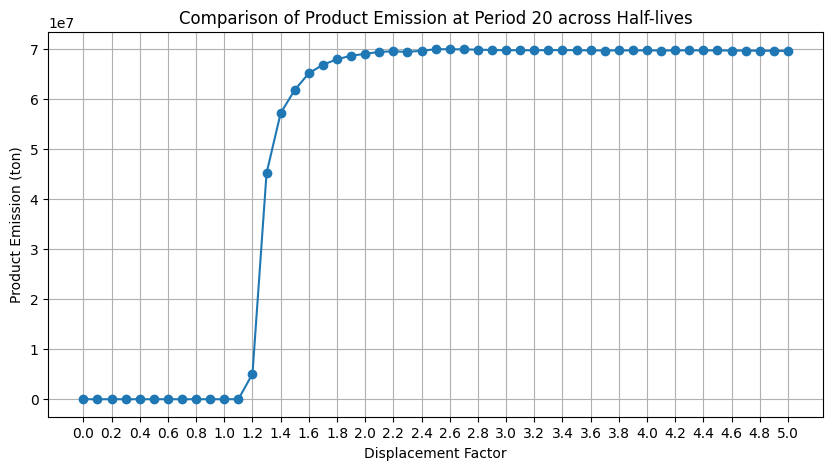

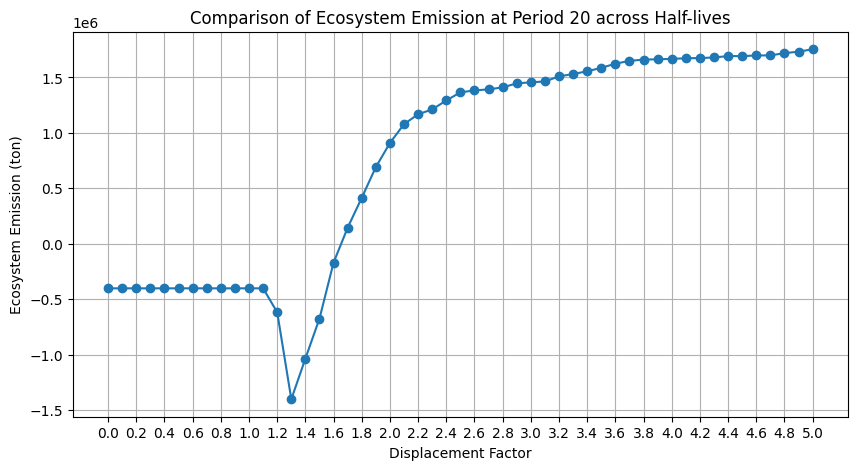

In [18]:
max_x_value = round(iteration_df * 0.1, 1)  # Calculate the maximum x value dynamically

# 1. Plot for 'Harvested Area' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(oha_period.keys()), list(oha_period.values()), marker='o')
plt.title(f'Comparison of Harvested Area at Period {extract_period} across Half-lives')
plt.xlabel('Displacement Factor')
plt.ylabel('Harvested Area (ha)')
plt.xticks(np.arange(0.0, max_x_value + 0.1, 0.2))  # Dynamically set x-axis ticks based on max_x_value
plt.grid(True)
plt.show()

# 2. Plot for 'Harvested Volume' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(ohv_period.keys()), list(ohv_period.values()), marker='o')
plt.title(f'Comparison of Harvested Volume at Period {extract_period} across Half-lives')
plt.xlabel('Displacement Factor')
plt.ylabel('Harvested Volume (m3)')
plt.xticks(np.arange(0.0, max_x_value + 0.1, 0.2))  # Dynamically set x-axis ticks based on max_x_value
plt.grid(True)
plt.show()

# 3. Plot for 'Growing Stock' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(ogs_period.keys()), list(ogs_period.values()), marker='o')
plt.title(f'Comparison of Growing Stock at Period {extract_period} across Half-lives')
plt.xlabel('Displacement Factor')
plt.ylabel('Growing Stock (m3)')
plt.xticks(np.arange(0.0, max_x_value + 0.1, 0.2))  # Dynamically set x-axis ticks based on max_x_value
plt.grid(True)
plt.show()

# 4. Plot for 'Total System Carbon Stock' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(system_stock_period.keys()), list(system_stock_period.values()), marker='o')
plt.title(f'Comparison of Total System Carbon Stock at Period {extract_period} across Half-lives')
plt.xlabel('Displacement Factor')
plt.ylabel('Total System Carbon Stock (ton)')
plt.xticks(np.arange(0.0, max_x_value + 0.1, 0.2))  # Dynamically set x-axis ticks based on max_x_value
plt.grid(True)
plt.show()

# 5. Plot for 'Net System Carbon Emission' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(system_emission_period.keys()), list(system_emission_period.values()), marker='o')
plt.title(f'Comparison of Net System Carbon Emission at Period {extract_period} across Half-lives')
plt.xlabel('Displacement Factor')
plt.ylabel('Net System Carbon Emission (ton)')
plt.xticks(np.arange(0.0, max_x_value + 0.1, 0.2))  # Dynamically set x-axis ticks based on max_x_value
plt.grid(True)
plt.show()

# 6. Plot for 'Product Stock' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(product_stock_period.keys()), list(product_stock_period.values()), marker='o')
plt.title(f'Comparison of Product Stock at Period {extract_period} across Half-lives')
plt.xlabel('Displacement Factor')
plt.ylabel('Product Stock (ton)')
plt.xticks(np.arange(0.0, max_x_value + 0.1, 0.2))  # Dynamically set x-axis ticks based on max_x_value
plt.grid(True)
plt.show()

# 7. Plot for 'Ecosystem Stock' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(ecosystem_stock_period.keys()), list(ecosystem_stock_period.values()), marker='o')
plt.title(f'Comparison of Ecosystem Stock at Period {extract_period} across Half-lives')
plt.xlabel('Displacement Factor')
plt.ylabel('Ecosystem Stock (ton)')
plt.xticks(np.arange(0.0, max_x_value + 0.1, 0.2))  # Dynamically set x-axis ticks based on max_x_value
plt.grid(True)
plt.show()

# 8. Plot for 'Product Emission' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(product_emission_period.keys()), list(product_emission_period.values()), marker='o')
plt.title(f'Comparison of Product Emission at Period {extract_period} across Half-lives')
plt.xlabel('Displacement Factor')
plt.ylabel('Product Emission (ton)')
plt.xticks(np.arange(0.0, max_x_value + 0.1, 0.2))  # Dynamically set x-axis ticks based on max_x_value
plt.grid(True)
plt.show()

# 9. Plot for 'Ecosystem Emission' at the specified period
plt.figure(figsize=(10, 5))
plt.plot(list(ecosystem_emission_period.keys()), list(ecosystem_emission_period.values()), marker='o')
plt.title(f'Comparison of Ecosystem Emission at Period {extract_period} across Half-lives')
plt.xlabel('Displacement Factor')
plt.ylabel('Ecosystem Emission (ton)')
plt.xticks(np.arange(0.0, max_x_value + 0.1, 0.2))  # Dynamically set x-axis ticks based on max_x_value
plt.grid(True)
plt.show()

# Compare the Model Sensitivity to Both HWP Half-life and Displacement Factor

In [19]:
base_folder_both = 'results/minimize_emission_loop/half_life/even_flow'

In [20]:
iteration_both = 200

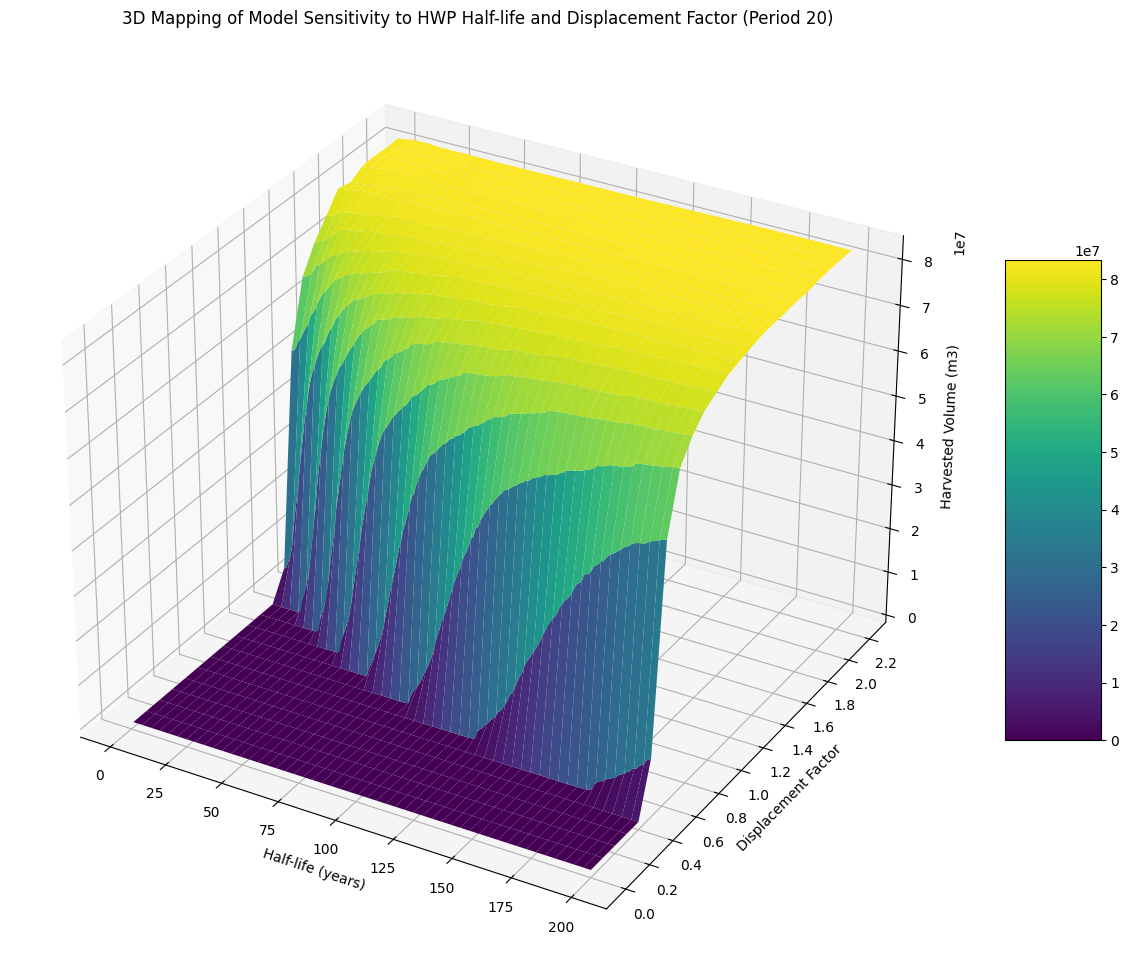

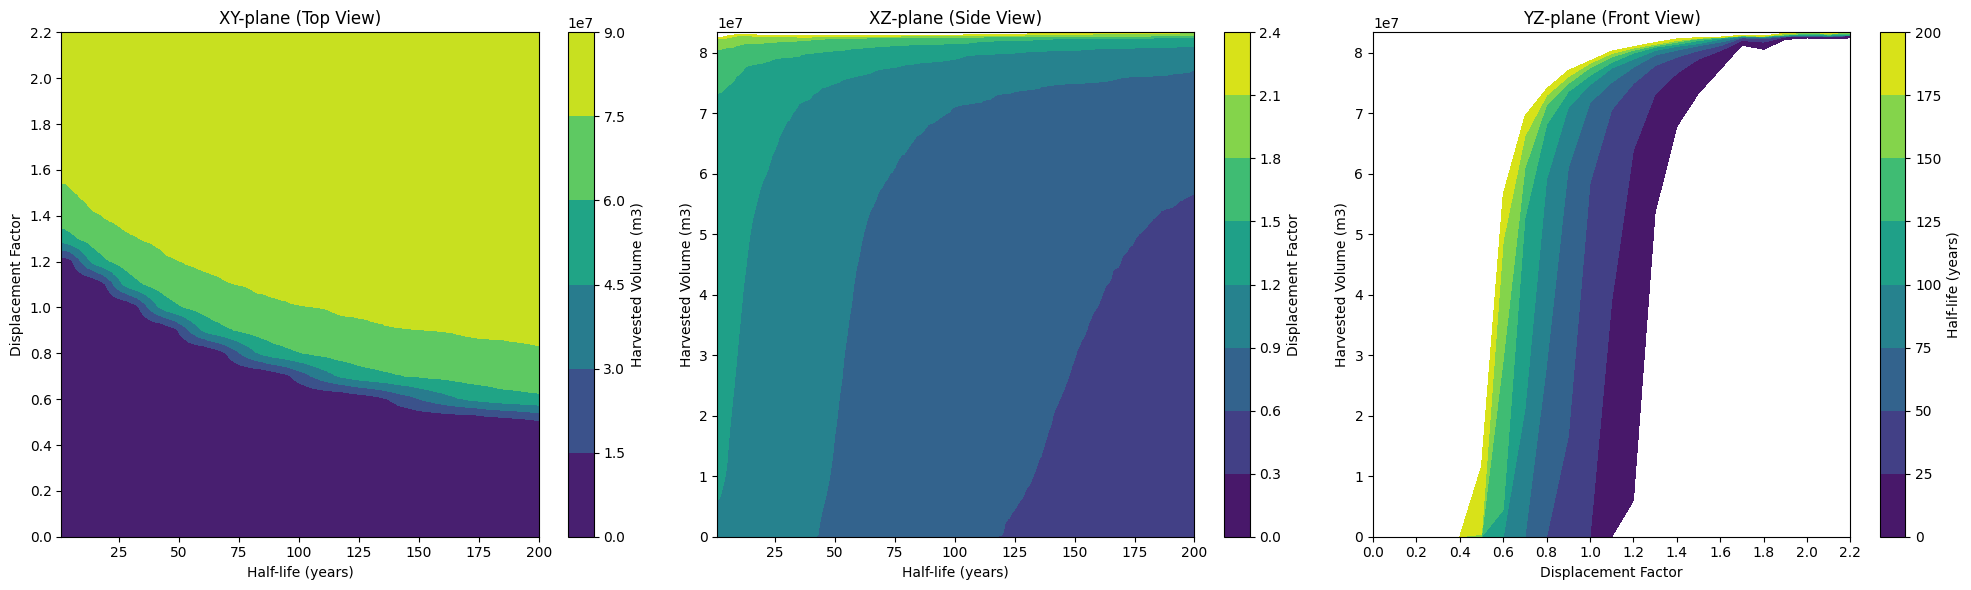

In [22]:
# Define the original range of displacement factors and half-lives
displacement_factors_both = [round(i * 0.1, 1) for i in range(23)]  # 0.0 to 2.2 with 0.1 steps (original data)
half_lives_both = range(1, iteration_both+1)  # Example: Adjust the iteration range

# Specify the period you want to extract and the column you want to analyze
column_to_extract = 'ohv'  # Choose the column to extract ('oha', 'ohv', 'ogs', 'ocp', or 'ocf')

# Initialize a dictionary to store values for each displacement factor
extracted_values = {df: [] for df in displacement_factors_both}

# Extract the specified column value from the target period for each combination of displacement factor and half-life
for df in displacement_factors_both:
    folder_path = os.path.join(base_folder_both, f"df_{df}")
    
    for hl in half_lives_both:
        csv_file = os.path.join(folder_path, "harvest", f"{hl}.csv")
        if os.path.exists(csv_file):
            df_data = pd.read_csv(csv_file)
            # Extract the specified column value from the target period
            period_value = df_data[df_data['period'] == extract_period][column_to_extract].values
            extracted_values[df].append(period_value[0])

# Prepare data for 3D plotting
X, Y = np.meshgrid(half_lives_both, displacement_factors_both)  # Create a grid of half-lives and displacement factors
Z = np.array([extracted_values[df] for df in displacement_factors_both])  # Harvested volume as Z

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Half-life (years)')
ax.set_ylabel('Displacement Factor')
ax.set_zlabel('Harvested Volume (m3)')
ax.set_title(f'3D Mapping of Model Sensitivity to HWP Half-life and Displacement Factor (Period {extract_period})')

# Set displacement factor ticks, without altering the data points (from 0.0 to 2.2 with 0.2 increments)
ax.set_yticks(np.arange(0, 2.3, 0.2))  # This is only for axis display, data remains the same

# Add color bar for better visualization of values
fig.colorbar(surf, shrink=0.5, aspect=5)

# Rotate the plot manually (optional)
# ax.view_init(elev=90, azim=-90)  # Default view with manual rotation
ax.view_init(elev=30, azim=-60)  # Default 3D plot view

plt.tight_layout()
plt.show()

# Create 2D projections with color bars
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# XY-plane (Top View)
xy_contour = axes[0].contourf(X, Y, Z, cmap='viridis')
axes[0].set_title('XY-plane (Top View)')
axes[0].set_xlabel('Half-life (years)')
axes[0].set_ylabel('Displacement Factor')
axes[0].set_yticks(np.arange(0, 2.3, 0.2))  # Adjust ticks for displacement factor
cbar_xy = fig.colorbar(xy_contour, ax=axes[0])
cbar_xy.set_label('Harvested Volume (m3)')

# XZ-plane (Side View)
xz_contour = axes[1].contourf(X, Z, Y, cmap='viridis')  # Force the color scale from 0 to 2.2
axes[1].set_title('XZ-plane (Side View)')
axes[1].set_xlabel('Half-life (years)')
axes[1].set_ylabel('Harvested Volume (m3)')
cbar_xz = fig.colorbar(xz_contour, ax=axes[1])  # Set color bar ticks
cbar_xz.set_label('Displacement Factor')

# YZ-plane (Front View)
yz_contour = axes[2].contourf(Y, Z, X, cmap='viridis')
axes[2].set_title('YZ-plane (Front View)')
axes[2].set_xlabel('Displacement Factor')
axes[2].set_ylabel('Harvested Volume (m3)')
axes[2].set_xticks(np.arange(0, 2.3, 0.2))  # Adjust ticks for displacement factor
cbar_yz = fig.colorbar(yz_contour, ax=axes[2])
cbar_yz.set_label('Half-life (years)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()